# Biblioteca Pandas

O Pandas é uma biblioteca de código aberto do Python voltada para a manipulação e análise de dados. Ele fornece estruturas de dados eficientes, como DataFrames e Series, que facilitam a organização, transformação e análise de grandes conjuntos de dados de forma intuitiva. Com Pandas, podemos realizar operações como limpeza, filtragem, agregação e visualização de dados de maneira eficiente.

# Sua Importância

No mundo da ciência de dados, a qualidade da análise depende diretamente da qualidade dos dados. O Pandas permite realizar pré-processamento, detectar e tratar valores ausentes, transformar colunas e gerar insights valiosos antes mesmo de partir para modelos estatísticos ou machine learning.




# Exemplo Prático

No exemplo prático, utilizaremos o Pandas para manipular dados da COVID-19 disponibilizados pela Our World in Data.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [6]:
df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df = df.drop_duplicates()

In [15]:
df['cases_per_million'] = df['total_cases'] / (df['population'] / 1_000_000)
df['deaths_per_million'] = df['total_deaths'] / (df['population'] / 1_000_000)

In [16]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,cases_per_million,deaths_per_million
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,16322.132498,351.704071
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,16322.132498,351.704071
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,16322.132498,351.704071
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,16322.132498,351.704071
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN,16322.132498,351.704071


In [12]:
df_grouped = df.groupby('location')[['total_cases', 'total_deaths']].sum().reset_index()

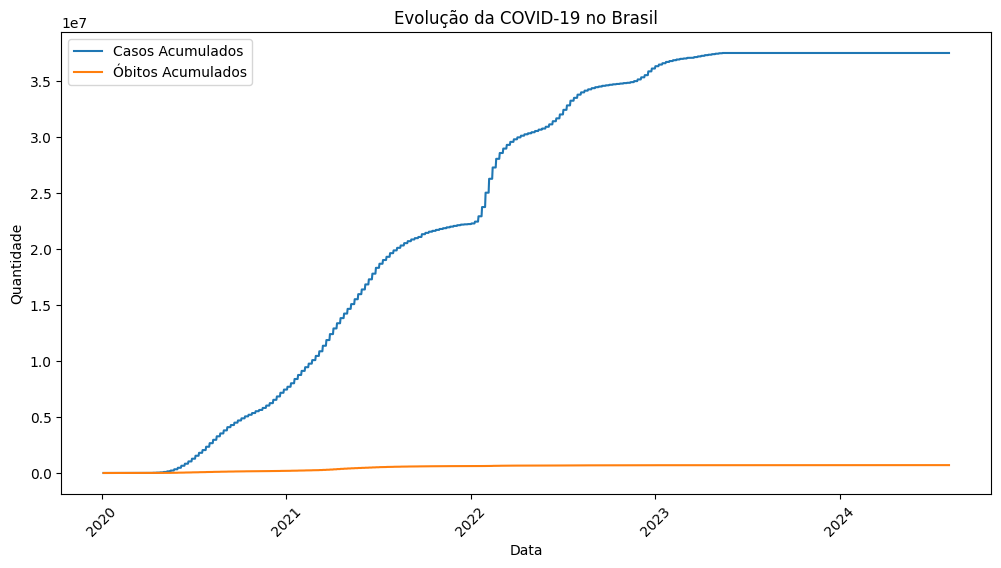

In [17]:
brasil_df = df[df['location'] == 'Brazil']
plt.figure(figsize=(12,6))
sns.lineplot(data=brasil_df, x='date', y='total_cases', label='Casos Acumulados')
sns.lineplot(data=brasil_df, x='date', y='total_deaths', label='Óbitos Acumulados')
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.title("Evolução da COVID-19 no Brasil")
plt.legend()
plt.xticks(rotation=45)
plt.show()

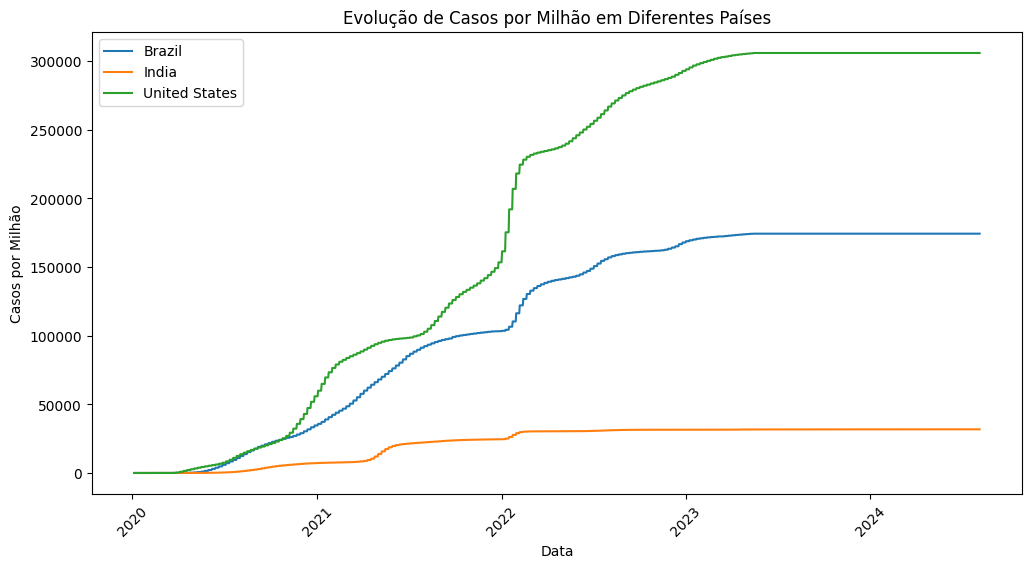

In [18]:
paises = ['Brazil', 'United States', 'India']
df_paises = df[df['location'].isin(paises)]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_paises, x='date', y='cases_per_million', hue='location')
plt.xlabel("Data")
plt.ylabel("Casos por Milhão")
plt.title("Evolução de Casos por Milhão em Diferentes Países")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-a611bad48a91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_casos, x='total_cases', y='location', palette='Reds_r')


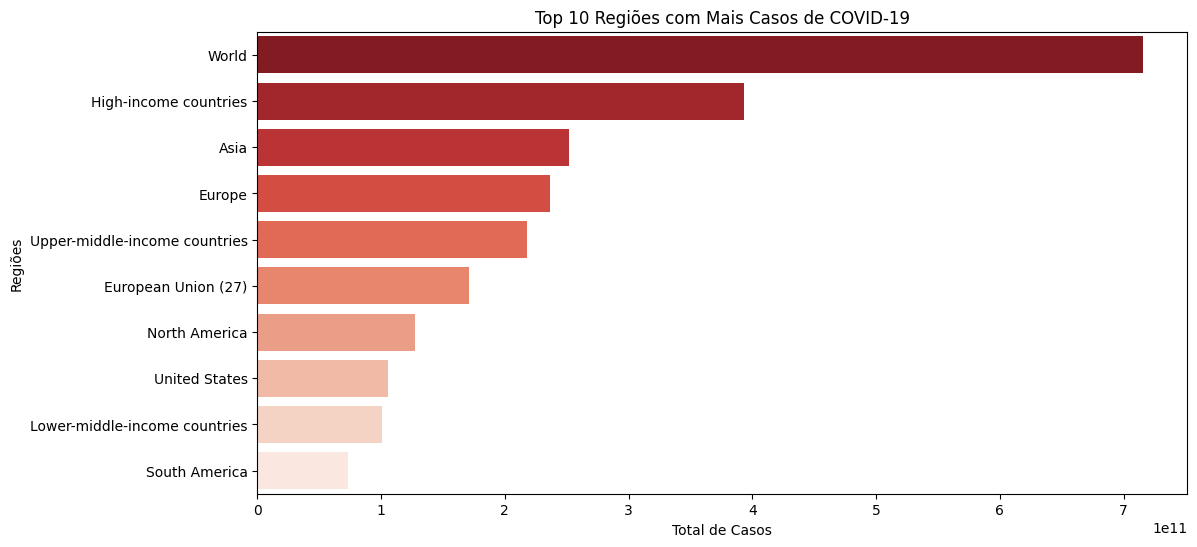

In [20]:
top_casos = df_grouped.sort_values(by='total_cases', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_casos, x='total_cases', y='location', palette='Reds_r')
plt.xlabel("Total de Casos")
plt.ylabel("Regiões")
plt.title("Top 10 Regiões com Mais Casos de COVID-19")
plt.show()

<ipython-input-22-9683c93e962f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_obitos, x='total_deaths', y='location', palette='Blues_r')


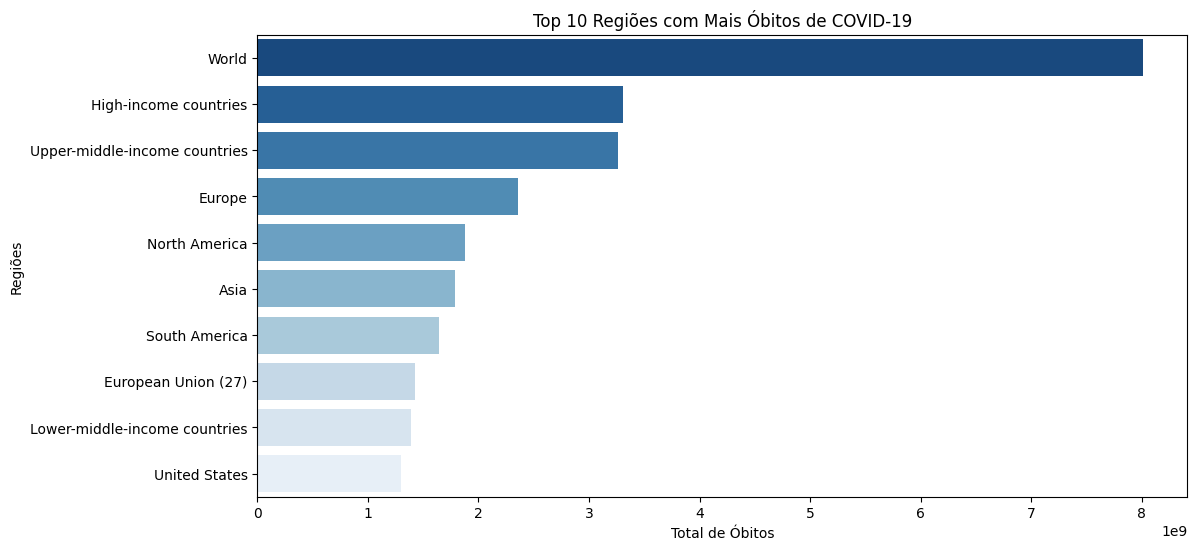

In [22]:
top_obitos = df_grouped.sort_values(by='total_deaths', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_obitos, x='total_deaths', y='location', palette='Blues_r')
plt.xlabel("Total de Óbitos")
plt.ylabel("Regiões")
plt.title("Top 10 Regiões com Mais Óbitos de COVID-19")
plt.show()

In [23]:
df.to_csv("dados_covid_tratados.csv", index=False)

print("Processamento concluído e arquivo salvo!")

Processamento concluído e arquivo salvo!


# Conclusão

O Pandas é uma ferramenta essencial para qualquer profissional que trabalhe com dados. No exemplo prático, mostramos como estruturar e preparar um dataset para análises mais avançadas, garantindo que os dados estejam limpos e organizados. Esse processo é fundamental para tornar os insights mais confiáveis e facilitar a tomada de decisões baseadas em dados.